In [980]:
# Importing packages.

import math as math
import numpy as np
import matplotlib.pyplot as plt

In [693]:
# Read the lines (seperate case)

gg_file = open('./CrossFiles/gg7Ms.txt', 'r') 
gq_file = open('./CrossFiles/gq7Ms.txt', 'r')

gg_lines = gg_file.readlines()
gq_lines = gq_file.readlines()

gg_file.close()
gq_file.close()

print(len(gg_lines))
print(len(gq_lines))

800
800


In [1033]:
# Read the lines (together case)

file = open('./CrossFiles/13.6 TeV/7Ms.txt', 'r')  
lines = file.readlines()
file.close()
print(len(lines))

1060


In [694]:
# Make array with gg_cross.txt.

gg_cross = []

i = 0    # counter

for line in enumerate(gg_lines):
    gg_cross.append(line[1])
    gg_cross[i] = float(gg_cross[i])
    i = i + 1
    
print(gg_cross[0])

6.858193848034071e-07


In [1034]:
# Make arrays

spaces = []       # where the spaces are in each line.       
first, second, third, fourth, fifth, sixth, seventh = [], [], [], [], [], [], []

gg_cross, gq_cross = [], []    # total cross-sections
q1, q2, q3, q4, q5 = [], [], [], [], []      # cross section for each quark

for line in enumerate(lines):
    
    for i in range(len(line[1])):

        if line[1][i] == ' ':

            spaces.append(i)
            
                
i = 0                # counter

while i < (len(spaces)): 
    
    first.append(spaces[i]) 
    second.append(spaces[i+1]) 
    third.append(spaces[i+2]) 
    fourth.append(spaces[i+3]) 
    fifth.append(spaces[i+4]) 
    sixth.append(spaces[i+5]) 
    seventh.append([i+6])
    
    i = i + 7

i = 0                # counter

for line in enumerate(lines): 
    
    gg_cross.append(line[1][0 : first[i]])
    gg_cross[i] = float(gg_cross[i])
    
    q1.append(line[1][first[i]+1 : second[i]])
    q1[i] = float(q1[i])
    
    q2.append(line[1][second[i]+1 : third[i]])
    q2[i] = float(q2[i])
    
    q3.append(line[1][third[i]+1 : fourth[i]])
    q3[i] = float(q3[i])
    
    q4.append(line[1][fourth[i]+1 : fifth[i]])
    q4[i] = float(q4[i])
    
    q5.append(line[1][fifth[i]+1 : sixth[i]])
    q5[i] = float(q5[i])
 
    gq_cross.append(q1[i] + q2[i] + q3[i] + q4[i] + q5[i])

    i = i + 1
    
total = []

for i in range(len(gg_cross)):
    total.append(gg_cross[i] + gq_cross[i])

In [1031]:
# Make the invariant mass array.

M = 3000             # lower limit on invariant mass interval
invariant_Mass = []

while M < 13600:
    invariant_Mass.append(M)
    M = M + 10

# Scale data
    
for i in range(len(invariant_Mass)):
    invariant_Mass[i] = invariant_Mass[i]/1000
    gg_cross[i] = gg_cross[i]*1000
    gq_cross[i] = gq_cross[i]*1000
    total[i] = total[i]*1000

In [996]:
# Find the lower mass cut

a = total[0]
Ms = 5

for i in range(len(total)):
    if total[i] < a:
        a = total[i]
        Lowcut = invariant_Mass[i]
    if invariant_Mass[i] == Ms:
        break
        
print('The lower mass cut is', Lowcut, 'TeV')

The lower mass cut is 4.64 TeV


In [687]:
# Find maximums for each set and scale data

a, b = 0, 0

for i in range(len(total)):
    if total[i] > a:
        a = total[i]
    if comparison_points[i] > b:
        b = comparison_points[i]
        
print('Scale factor is', b/a)

scaled = []

for i in range(len(total)):
    scaled.append( (b/a)*total[i] )
    
# Read-in comparison plot, and generate comparison points with the same x-coords 

df = np.genfromtxt('./CSVs/paperComparisonGood.csv', delimiter=',')
df_x, df_y = [], []
comparison_points = []

for i in range(len(df)):
    df_x.append(df[i][0])
    df_y.append(df[i][1])

for i in range(len(invariant_Mass)):
    
    for j in range(len(df_x)-1):
        
        if df_x[j] <= invariant_Mass[i] and df_x[j+1] > invariant_Mass[i]: 
            comparison_points.append( (df_y[j]/df_x[j])*(invariant_Mass[i]-df_x[j+1]) + df_y[j+1] )
            break 
            
print(len(comparison_points))
print(len(invariant_Mass))

Scale factor is 0.5230714484151235


In [1035]:
# PLOT

plt.switch_backend('agg')
fig, ax = plt.subplots()
plt.xlim(2.8, 13.8)
ax.set_yscale('log')

plt.plot(invariant_Mass, gg_cross, 'o', markersize=0.25, label = 'gg', color = 'red')
plt.plot(invariant_Mass, gq_cross, 'o', markersize=0.25, label = 'gq', color = 'blue')
plt.plot(invariant_Mass, total, 'o', markersize=0.25, label = 'total', color = 'green')
#plt.plot(invariant_Mass, comparison_points, 'o', markersize=0.25, color='blue', alpha=0.6, label = 'Anchordoqui')
#plt.plot(invariant_Mass, scaled, 'o', markersize=0.25, color='red', alpha=0.6, label = 'Scaled Data')

plt.xlabel('M (TeV)')
plt.ylabel('d$\sigma$/dM (fb/TeV)')
plt.legend(loc='upper right')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')
plt.xticks(range(3, 14, 1))

plt.text(4.5, 1e-11, '$\sqrt{s}$ = 13.6 TeV', fontsize=10, ha='center', va='center')
plt.text(4.5, 1e-13, '$\kappa^2$ = 0.02', fontsize = 10, ha='center', va='center')
plt.text(4.5, 1e-15, '$M_{s}$ = 7 TeV', fontsize = 10, ha='center', va='center')

plt.show()

plt.savefig('./Bump Hunt Figures/7Ms.pdf',dpi=100,bbox_inches='tight')
print(len(total), len(comparison_points))
print(total[419], comparison_points[419])
plt.clf()

1060 422
1.0267141688146244e-06 1.4154807685269994e-07


In [692]:
# Ratio plot
plt.switch_backend('agg')

percentErr, scaledErr = [], []

for i in range(len(comparison_points)):
    percentErr.append( total[i]/comparison_points[i] )
    scaledErr.append( scaled[i]/comparison_points[i] )
    
avgErr = np.sum(percentErr)/(len(percentErr))
avgScaled = np.sum(scaledErr)/len(scaledErr)
    
print('Before Scaling:', avgErr, 'After Scaling:', avgScaled)
    
plt.xlim(2500, 6700)

plt.ylabel('strings/Anchordoqui')
#plt.yticks(range(-1e-1, 9e-1, 1e-1))
#plt.ylim(0.4,1)
plt.xlabel('Invariant Mass (GeV)')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.text(6000, 0.9, r'$\alpha_{s}$ = 0.1', fontsize = 10, ha='center', va='center')

plt.plot(invariant_Mass, percentErr, 'o', markersize=0.25, color = 'green')
plt.plot(invariant_Mass, scaledErr, 'o', markersize=0.25, color = 'red')

plt.show()
plt.savefig('retry ratio.pdf',dpi=100,bbox_inches='tight')
plt.clf()

Before Scaling: 1.8887903902255916 After Scaling: 0.9879723251678665


In [133]:
# Difference plot
plt.clf()

difference = []

for i in range(len(comparison_points)):
    difference.append(total[i]-comparison_points[i])
    print(difference[i])
    
plt.switch_backend('agg')

fig, ax = plt.subplots()
    
plt.xlim(2500,6700)
plt.ylim(1e-8,1e-2)
#ax.set_yscale('log')
plt.ylabel('strings - Anchordoqui (difference)')
plt.xlabel('Invariant Mass (GeV)')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.plot(invariant_Mass, difference, 'o', markersize=0.25)

plt.show()
plt.savefig('difference plot 01 coupling bugfix.pdf',dpi=100,bbox_inches='tight')
plt.clf()

1.8677629090871556e-06
1.877443731441693e-05
1.595132057186869e-06
1.0883067630242712e-05
-5.3266543384838374e-06
1.059375087777341e-05
-4.688562324305372e-06
2.5708438964880875e-06
2.457415345465141e-06
1.0007384964439315e-05
1.1317618531345717e-05
-1.895618479579096e-06
5.485457966491775e-06
6.2657333924827385e-06
-5.86529169437544e-06
1.995757262067963e-06
-9.513059032033983e-06
-2.404749119498434e-06
3.7032473217352233e-06
1.5447361847153128e-05
5.248287684509801e-06
1.1964307551241902e-05
2.307382528624177e-06
1.2737007189795658e-05
3.5717384140244893e-06
5.213449350280894e-06
1.1389097458617181e-05
2.9387509124372837e-06
8.054476944445866e-06
3.7685705498607426e-08
6.015150037153873e-06
-1.598782193289205e-06
3.845516405073205e-06
9.02032695345806e-06
2.0556484846446653e-06
7.18011174843968e-06
8.759196196875805e-06
2.3418587188852756e-06
7.241862071542631e-06
1.222685519718141e-05
6.288211676306655e-06
1.4424226900591167e-05
8.782574566174137e-06
3.263842943249665e-06
4.59510731

In [ ]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

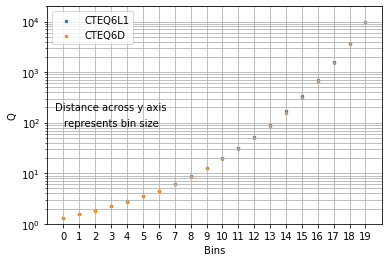

In [479]:
# Compare Q binning

qBinsL1 = [1.30000E+00, 1.53865E+00, 1.84636E+00, 2.24885E+00, 2.78358E+00, 3.50602E+00,
 4.50000E+00, 6.20054E+00, 8.81356E+00, 1.29625E+01, 1.97913E+01, 3.14839E+01,
 5.23915E+01, 9.15982E+01, 1.69063E+02, 3.31152E+02, 6.92354E+02, 1.55489E+03,
 3.77707E+03, 1.00000E+04]
qBinsD = [1.30000E+00, 1.53106E+00, 1.83098E+00, 2.22659E+00, 2.75766E+00, 3.48439E+00,
 4.50000E+00, 6.12359E+00, 8.60159E+00, 1.25127E+01, 1.89184E+01, 2.98475E+01,
 4.93546E+01, 8.59491E+01, 1.58477E+02, 3.11214E+02, 6.55142E+02, 1.48904E+03,
 3.68299E+03, 1.00000E+04]

binNumber = [x for x in range(0, 20)]

plt.switch_backend('agg')
fig, ax = plt.subplots()
ax.set_yscale('log')
plt.ylim(1, 2e4)
plt.xticks(range(0, 20, 1))
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.scatter(binNumber, qBinsL1, label ='CTEQ6L1', s=6)
plt.scatter(binNumber, qBinsD, label ='CTEQ6D', s=6)

plt.xlabel('Bins')
plt.ylabel('Q')
plt.legend(loc='upper left')
plt.text(3, 2e2, 'Distance across y axis', fontsize=10, ha='center', va='center')
plt.text(3, 1e2, 'represents bin size', fontsize=10, ha='center', va='center')

plt.show()
plt.savefig('qBins.pdf')



In [557]:
########################################################################################################################## 
# RATIO PLOT TO COMPARE BEFORE AND AFTER T-CHANNEL BUG FIX

# Read the LHE lines.

gg_file = open('./CrossFiles/ggCross5MsBUGFIX.txt', 'r')
gq_file = open('./CrossFiles/gqCross5MsBUGFIX.txt', 'r')

gg_lines = gg_file.readlines()
gq_lines = gq_file.readlines()

gg_file.close()
gq_file.close()

print(len(gg_lines))

422


In [547]:
# Make array with gg_cross.txt.

gg_cross = []

i = 0    # counter

for line in enumerate(gg_lines):
    gg_cross.append(line[1])
    gg_cross[i] = float(gg_cross[i])
    i = i + 1
    
print(gg_cross[0])

0.00047641551452061876


In [548]:
# Make array with gq_cross.txt

spaces = []       # where the spaces are in each line.       
first, second, third, fourth, fifth, sixth = [], [], [], [], [], []         # the cross section for each quark flavour.

gq_cross = []

for line in enumerate(gq_lines):

    for i in range(len(line[1])):

        if line[1][i] == ' ':

            spaces.append(i)
        
i = 0                # counter

while i < (len(spaces)): 
    
    first.append(spaces[i]) 
    second.append(spaces[i+1]) 
    third.append(spaces[i+2]) 
    fourth.append(spaces[i+3]) 
    fifth.append(spaces[i+4]) 
    sixth.append(spaces[i+5]) 
    
    i = i + 6

q1, q2, q3, q4, q5 = [], [], [], [], []

i = 0                # counter

for line in enumerate(gq_lines): 
    
    q1.append(line[1][0 : first[i]])
    q1[i] = float(q1[i])
    
    q2.append(line[1][first[i]+1 : second[i]])
    q2[i] = float(q2[i])
    
    q3.append(line[1][second[i]+1 : third[i]])
    q3[i] = float(q3[i])
    
    q4.append(line[1][third[i]+1 : fourth[i]])
    q4[i] = float(q4[i])
    
    q5.append(line[1][fourth[i]+1 : fifth[i]])
    q5[i] = float(q5[i])
 
    gq_cross.append(q1[i] + q2[i] + q3[i] + q4[i] + q5[i])

    i = i + 1
    
print(gg_cross[0])

0.00047641551452061876


In [118]:
# Make the total array

totalBF = []

for i in range(len(gg_cross)):
    totalBF.append(gg_cross[i] + gq_cross[i])

In [119]:
# Find ratios 

ratio = []

for i in range(len(totalBF)):
    ratio.append(totalBF[i]/total[i])

# print(ratio)

In [120]:
plt.xlim(2500, 6700)
plt.ylim(-50, 50)

plt.ylabel('% Error: After Fix/Before')
plt.yticks(range(-10, 90, 10))
plt.xlabel('Invariant Mass (GeV)')
plt.grid(True, which='both', axis='y')
plt.grid(True, which='both', axis='x')

plt.plot(invariant_Mass, ratio)

plt.show()
plt.savefig('ratio plot for rounded.pdf',dpi=100,bbox_inches='tight')
plt.clf()